Supermart Sales Analysis

In [51]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\disha\Desktop\New folder\Supermart\train.csv")


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9786 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9788 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9768 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,NaN,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,NaN,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [65]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df["Country"].unique()

array(['United States', nan], dtype=object)

In [57]:
df['Country'] = df['Country'].fillna('United States')

In [58]:
state_dict = (
    df.groupby('City')['Postal Code'].unique().apply(list).to_dict()
)

In [59]:
for city, code in state_dict.items():
    if pd.notna(code[0]):  
        df["Postal Code"] = np.where(
            df["Postal Code"].isnull() & (df["City"] == city),
            int(code[0]),  
            df["Postal Code"]
        )

In [60]:
df["Postal Code"] = df["Postal Code"].astype("Int64") 

In [61]:
Product_category = (
    df.groupby('Category')['Sub-Category'].unique().apply(list).to_dict()
)

In [62]:
Product_category

{'Furniture': ['Chairs', 'Furnishings', 'Tables', 'Bookcases'],
 'Office Supplies': ['Labels',
  'Storage',
  'Binders',
  'Appliances',
  'Art',
  'Envelopes',
  'Paper',
  'Fasteners',
  'Supplies'],
 'Technology': ['Phones', 'Accessories', 'Machines', 'Copiers']}

In [63]:
for category, product in Product_category.items():
    df["Category"] = np.where(df["Category"].isnull() & df["Sub-Category"].isin(product),category,df["Category"])

In [99]:
df.to_csv('Corrected_Train.csv', index=False)

In [68]:
import matplotlib.pyplot as plt

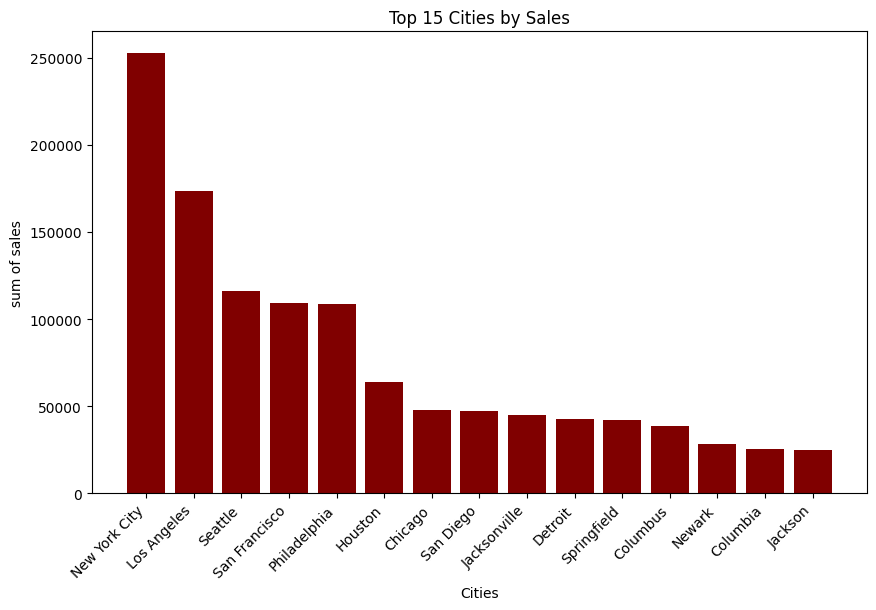

In [78]:
top_cities=df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(15).round(2)
plt.figure(figsize=(10,6))
plt.bar(top_cities.index, top_cities.values, color='maroon')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Cities by Sales")
plt.xlabel("Cities")
plt.ylabel("sum of sales")
plt.show()

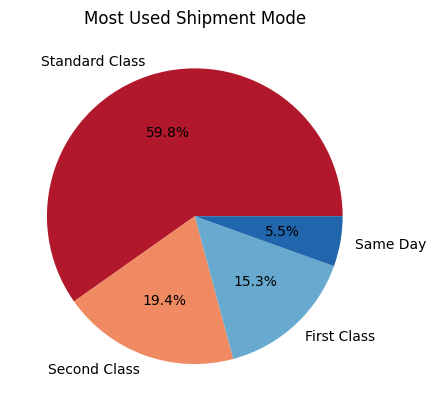

In [85]:
ship_counts = df['Ship Mode'].value_counts()
labels = ship_counts.index
plt.pie(ship_counts, labels=labels, autopct='%1.1f%%', colors=['#b2182b','#ef8a62','#67a9cf','#2166ac'])
plt.title("Most Used Shipment Mode")
plt.show()

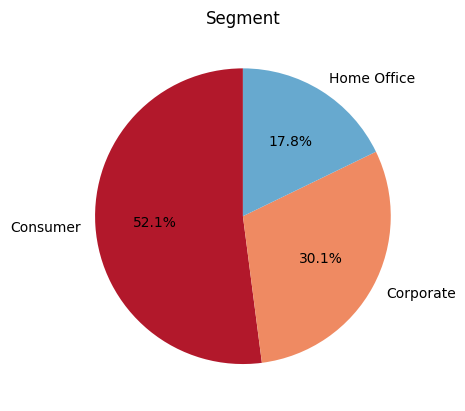

In [91]:
segment = df['Segment'].value_counts()
labels = segment.index
plt.pie(segment,labels=labels,autopct='%1.1f%%', startangle=90, colors=['#b2182b','#ef8a62','#67a9cf'])
plt.title("Segment")
plt.show()

In [92]:
import seaborn as sns

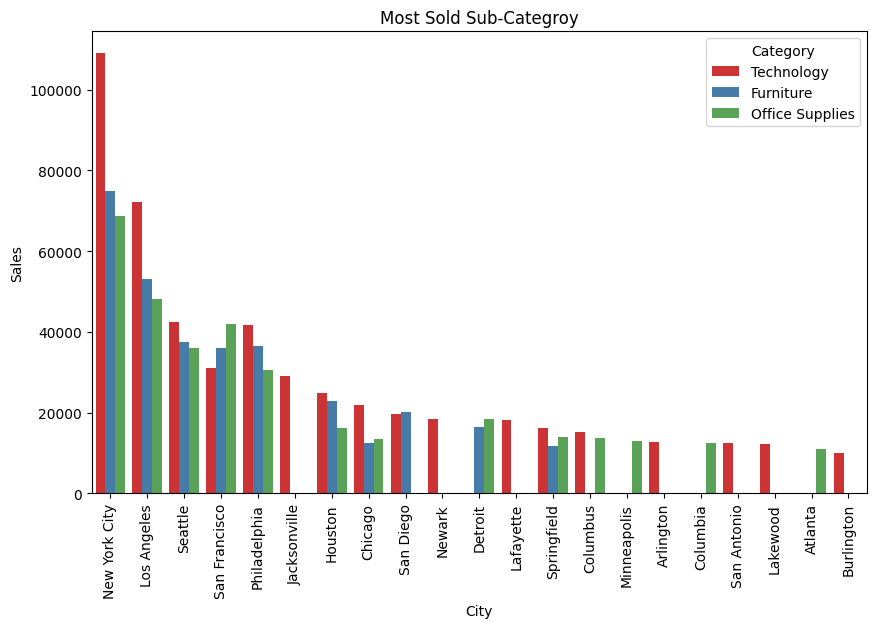

In [98]:
top_cities = (df.groupby(["City", "Category"])["Sales"].sum().nlargest(40).reset_index())
plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x="City", y="Sales", hue="Category", palette="Set1")
plt.xticks(rotation=90)
plt.title("Most Sold Sub-Categroy")
plt.show()